# Faster R-CNN Inception ResNet V2 1024x1024

## Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf /content/sample_data

Mounted at /content/drive


## Cloning repository

In [3]:
!git clone https://github.com/arrafi-musabbir/license-plate-detection-recognition.git

Cloning into 'license-plate-detection-recognition'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 17.17 KiB | 4.29 MiB/s, done.


## Installing necessary libraries

In [46]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [4]:
import os
%cd /content

!pip uninstall -q opencv-python opencv-contrib-python imgaug -y
!pip install -q imgaug==0.2.5 opencv-python-headless==4.1.2.30 lvis 

!pip install -q tf-models-official==2.8 tensorflow-gpu==2.8 keras==2.8 tensorboard==2.8 tensorflow-estimator==2.8
!pip install -q tensorflow.io

!apt-get install -q protobuf-compiler python-pil python-lxml python-tk
!apt install -q --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools

import tensorflow as tf
print("Installed Tensorflow version >>> ", tf.__version__)

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.7/562.7 KB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 120.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.1 MB/s

## Downloading the TensorFlow Model Garden

In [5]:
!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python /content/models/research/object_detection/builders/model_builder_test.py

/content/models/research
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN

## Protobuf Installation/Compilation

In [6]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


## COCO API installation

In [7]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools /content/models/research

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/models/research/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=f

## Test object detection API

In [8]:
%cd /content/models/research
%cp object_detection/packages/tf2/setup.py .
!python -q -m pip install .
!python object_detection/builders/model_builder_tf2_test.py

/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.2/526.2 KB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for object-dete

## Creating folder structure

In [9]:
import os 
workspace_path = '/content/drive/MyDrive/workspace/license-plate-detection/'
workspace_model_path = workspace_path + 'license_detection_FRCNN/'
annotation_path = workspace_model_path + 'annotations/'
exported_model_path = workspace_model_path + 'exported-models/'
images_path = workspace_model_path + 'images/'
trained_model_path = workspace_model_path + 'trained_model/'
pretrained_model_path = workspace_model_path + 'pre-trained-models/'

try:
    os.mkdir(workspace_path)
    print("Created workspace")
except FileExistsError :
    print("workspace directory already exists: creating rest of the structure inside workspace")
try:
    os.mkdir(workspace_model_path)
    os.mkdir(annotation_path)
    os.mkdir(exported_model_path)
    os.mkdir(images_path)
    os.mkdir(trained_model_path)
    os.mkdir(pretrained_model_path)
    print("full directory structure creation done")
except FileExistsError :
    print("directory structure already exists: Will be using existing directories")

workspace directory already exists: creating rest of the structure inside workspace
directory structure already exists: Will be using existing directories


In [13]:
# dataset folder path
dataset_path = "/content/drive/MyDrive/workspace/license-plate-detection/train"

## Creating labelmap.pbtxt

In [25]:
label_path = annotation_path + "label_map.pbtxt"

labels = [{'name':'plate', 'id':1}]

with open(label_path, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## Partitioning the dataset

In [11]:
partition_script = "/content/license-plate-detection-recognition/partition_dataset.py"

In [14]:
import time
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    if os.path.isdir(dataset_path):
        print("Dataset directory: ", dataset_path)
        !rm -rf {images_path}
        os.mkdir(images_path)
        print("Train-test directory: ", images_path)
        print("partition script: ", partition_script)
        print("\n")
        !python {partition_script} -x -i {dataset_path} -o {images_path} -r 0.1

        print("Dataset split into Train & Test")
        print("Cleaning up after partitioning dataset")
    else:
      print("Dataset doesn't exists")
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nExecution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
Dataset directory:  /content/drive/MyDrive/workspace/license-plate-detection/train
Train-test directory:  /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/images/
partition script:  /content/license-plate-detection-recognition/partition_dataset.py


/content/license-plate-detection-recognition/partition_dataset.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated)
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png|.bmp)$', f)]
Dataset split into Train & Test
Cleaning up after partitioning dataset

Execution time: 1.3150210777918498 minutes


## Generating TF records

In [19]:
gen_tfrecord_script = "/content/license-plate-detection-recognition/generate_tfrecord.py"

In [20]:
train_path = images_path + 'train/'
test_path = images_path + 'test/'
train_record_path = annotation_path + 'train.record'
test_record_path = annotation_path + 'test.record'

### train record

In [27]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    print("train path: ", train_path)
    print("train record path: ", train_record_path)
    !python {gen_tfrecord_script} -x {train_path} -l {label_path} -o {train_record_path}
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
train path:  /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/images/train/
train record path:  /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/annotations/train.record

Generated train.record successfully
Execution time: 0.22449971834818522 minutes


### test record

In [28]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    print("test path: ", test_path)
    print("test record path: ", test_record_path)
    !python {gen_tfrecord_script} -x {test_path} -l {label_path} -o {test_record_path}
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
test path:  /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/images/test/
test record path:  /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/annotations/test.record
Successfully created the TFRecord file: /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/annotations/test.record

Generated train.record successfully
Execution time: 0.1520349423090617 minutes


## Download & extract pretrained model

In [29]:
%cd /content/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!tar -xzvf /content/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz -C {pretrained_model_path}

print("\nDownload & extraction completed")

/content
--2023-01-26 18:55:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c11::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M  76.9MB/s    in 6.1s    

2023-01-26 18:55:34 (69.9 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]

faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_inception_resnet_v2_1024x1024_coc

## Configure training pipeline

In [30]:
%cd /content/
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

/content


In [31]:
CONFIG_PATH = trained_model_path + "pipeline.config"
pretrained_config_path = pretrained_model_path + "faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/pipeline.config"

In [32]:
try:
    os.mkdir(trained_model_path)
except FileExistsError :
    print("directory already exists")
!cp {pretrained_config_path} {trained_model_path}

directory already exists


In [33]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
config

{'model': faster_rcnn {
   num_classes: 90
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 800
       max_dimension: 1333
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_inception_resnet_v2_keras"
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_obje

In [34]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [35]:
pipeline_config.model.faster_rcnn.num_classes = 1
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = pretrained_model_path + "faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0"
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_config.use_bfloat16 = False
pipeline_config.train_input_reader.label_map_path= annotation_path + "label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [annotation_path + "train.record"]
pipeline_config.eval_input_reader[0].label_map_path = annotation_path + "label_map.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [annotation_path + "test.record"]

In [36]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [37]:
updated_config_path = CONFIG_PATH
updated_config = config_util.get_configs_from_pipeline_file(updated_config_path)
updated_config

{'model': faster_rcnn {
   num_classes: 1
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 800
       max_dimension: 1333
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_inception_resnet_v2_keras"
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_objec

## Training the model

### Configuring GPU

In [38]:
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Training model

In [39]:
!pip uninstall -q opencv-python -y
!pip install -q "opencv-python-headless<4.3" 

In [40]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir={trained_model_path} --pipeline_config_path={CONFIG_PATH} --num_train_steps=1000

/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10unique_

## Exporting model

In [41]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {CONFIG_PATH} --trained_checkpoint_dir {trained_model_path} --output_directory {exported_model_path}

/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10unique_

## Loading and Inferencing trained model

In [42]:
!pip uninstall -q opencv-python opencv-python-headless -y
!pip install -q "opencv-python-headless<4.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 56.6 MB/s eta 0:00:00


In [43]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = exported_model_path

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = label_path

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.80)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = exported_model_path + "saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


Loading model...Done! Took 37.015042304992676 seconds


## Detecting license plate

In [48]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATH = images_path + 'test/137.jpg'

Running inference for /content/drive/MyDrive/workspace/license-plate-detection/license_detection_FRCNN/images/test/137.jpg... 
Done


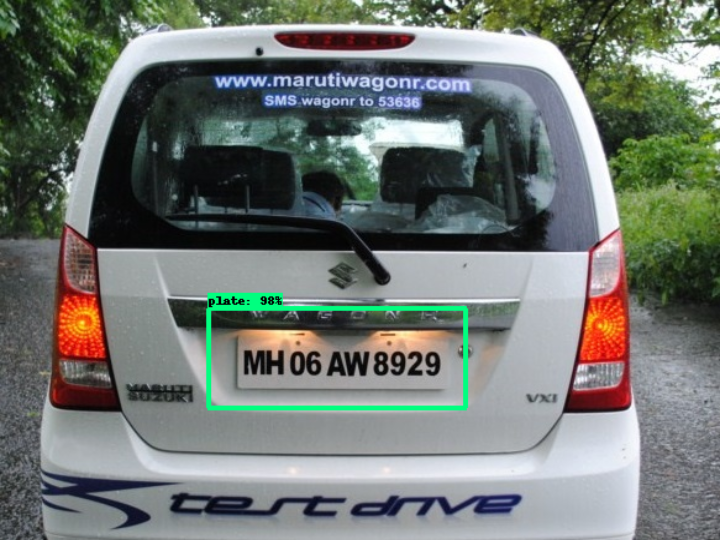

In [49]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


print('Running inference for {}... '.format(IMAGE_PATH), end='\n')

image = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=1,
      min_score_thresh=0.3,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
imS = cv2.resize(image_with_detections, (720, 540)) 
cv2_imshow(imS)
# CLOSES WINDOW ONCE KEY IS PRESSED

# Recognnize license plate

In [51]:
!sudo apt install -q tesseract-ocr
!pip install -q pytesseract

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 26 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,279 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.p

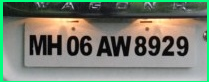

MH 06 AW8929 °



In [52]:
import pytesseract

ymin = detections['detection_boxes'][0][0]
xmin = detections['detection_boxes'][0][1]
ymax = detections['detection_boxes'][0][2]
xmax = detections['detection_boxes'][0][3]

(xminn, xmaxx, yminn, ymaxx) = (xmin * image_with_detections.shape[1], 
                                xmax * image_with_detections.shape[1], 
                                ymin * image_with_detections.shape[0], 
                                ymax * image_with_detections.shape[0])


cv2_imshow(image_with_detections[int(yminn):int(ymaxx),int(xminn):int(xmaxx)])

text = pytesseract.image_to_string(image_with_detections[int(yminn):int(ymaxx),int(xminn):int(xmaxx)])
print(text)

# With camera

In [ ]:
!pip -q install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 16.0 MB/s eta 0:00:00


In [ ]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/workspace/license_detection_FRCNN/images/test/149.jpg'

cap = cv2.VideoCapture(IMAGE_PATHS)
# cap = cv2.VideoCapture(0) ## for camera
while cv2.waitKey(1) < 0:

    hasFrame, frame = cap.read() #frame: an image object from cv2

    
    # Stop the program if reached end of video
    if not hasFrame:
      print("Done processing !!!\n")
      break

    def load_image_into_numpy_array(path):
        """Load an image from file into a numpy array.
        Puts image into numpy array to feed into tensorflow graph.
        Note that by convention we put it into a numpy array with shape
        (height, width, channels), where channels=3 for RGB.
        Args:
          path: the file path to the image
        Returns:
          uint8 numpy array with shape (img_height, img_width, 3)
        """
        return np.array(Image.open(path))


    print('Running inference for {}... '.format(IMAGE_PATHS), end='\n')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=1,
          min_score_thresh=0.3,
          agnostic_mode=False)

    print('Done')
    # DISPLAYS OUTPUT IMAGE
    imS = cv2.resize(image_with_detections, (720, 540)) 
    cv2_imshow(imS)
    # CLOSES WINDOW ONCE KEY IS PRESSED

    import pytesseract

    ymin = detections['detection_boxes'][0][0]
    xmin = detections['detection_boxes'][0][1]
    ymax = detections['detection_boxes'][0][2]
    xmax = detections['detection_boxes'][0][3]

    (xminn, xmaxx, yminn, ymaxx) = (xmin * image_with_detections.shape[1], 
                                    xmax * image_with_detections.shape[1], 
                                    ymin * image_with_detections.shape[0], 
                                    ymax * image_with_detections.shape[0])


    cv2_imshow(image_with_detections[int(yminn):int(ymaxx),int(xminn):int(xmaxx)])

    text = pytesseract.image_to_string(image_with_detections[int(yminn):int(ymaxx),int(xminn):int(xmaxx)])
    print(text)

error: ignored